Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.feature_selection import f_regression
import math
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import Bidirectional

## Data Pre-processing

Import Data

In [2]:
# Read data input files
date_format_1 = lambda x: datetime.strptime(x, '%Y-%m-%d')
date_format_2 = lambda x: datetime.strptime(x, '%d/%m/%Y')

df_price_000969_SZ = pd.read_csv("Datasets/Advanced Technology _ Materials Co., Ltd. (000969.SZ) Stock Prices.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_ASM_AX = pd.read_csv("Datasets/ASM.AX.csv", parse_dates=['Date'], date_parser=date_format_2)
df_price_000970_SZ = pd.read_csv("Datasets/Beijing Zhong Ke San Huan High-Tech Co., Ltd. (000970.SZ) Stock Prices.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_300127_SZ = pd.read_csv("Datasets/Chengdu Galaxy Magnets Co.,Ltd. (300127.SZ) Stock Prices.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_000795_SZ = pd.read_csv("Datasets/Innuovo Technology Co., Ltd. (000795.SZ) Stock Prices.csv", parse_dates=['Date'], date_parser=date_format_1)
df_interpolated_ev_sales = pd.read_csv("Datasets/Interpolated EV Sales.csv", parse_dates=['Date'], date_parser=date_format_2)
df_interpolated_wind_energy = pd.read_csv("Datasets/Interpolated Wind Energy.csv", parse_dates=['Date'], date_parser=date_format_1)
df_spline_interpolated_ev_sales = pd.read_csv("Datasets/Spline Interpolated EV Sales.csv", parse_dates=['Date'], date_parser=date_format_2)
df_spline_interpolated_wind_energy = pd.read_csv("Datasets/Spline Interpolated Wind Energy.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_LYC_AX = pd.read_csv("Datasets/LYC.AX.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_MP = pd.read_csv("Datasets/MP.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_NEO_TO = pd.read_csv("Datasets/NEO.TO.csv", parse_dates=['Date'], date_parser=date_format_2)
df_price_neodymium = pd.read_excel("Datasets/Neodymium Prices.xlsx", parse_dates=['Date'], date_parser=date_format_1)
df_price_600366_SS = pd.read_csv("Datasets/Ningbo Yunsheng Co., Ltd. (600366.SS) Stock Prices.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_600259_SS = pd.read_csv("Datasets/Rising Nonferrous Metals Share Co.,Ltd. (600259.SS) Stock Prices.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_002057_SZ = pd.read_csv("Datasets/Sinosteel New Materials Co., Ltd. (002057.SZ) Stock Prices.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_UUUU = pd.read_csv("Datasets/UUUU.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_300224_SZ = pd.read_csv("Datasets/Yantai Zhenghai Magnetic Material Co., Ltd. (300224.SZ) Stock Prices.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_002249_SZ = pd.read_csv("Datasets/Zhongshan Broad-Ocean Motor Co., Ltd. (002249.SZ) Stock Prices.csv", parse_dates=['Date'], date_parser=date_format_1)
df_price_USD_CNY = pd.read_csv("Datasets/USD_CNY.csv", parse_dates=['Date'], date_parser=date_format_2)


In [3]:
# Naming of data columns
all_df_price_names = [df_price_000969_SZ, df_price_ASM_AX, df_price_000970_SZ, df_price_300127_SZ, df_price_000795_SZ, df_price_LYC_AX, df_price_MP, df_price_NEO_TO, df_price_600366_SS, df_price_600259_SS, df_price_002057_SZ, df_price_UUUU, df_price_300224_SZ, df_price_002249_SZ, df_price_USD_CNY]
all_price_names = ["000969_SZ", "ASM_AX", "000970_SZ", "300127_SZ", "000795_SZ", "LYC_AX", "MP", "NEO_TO", "600366_SS", "600259_SS", "002057_SZ", "UUUU", "300224_SZ", "002249_SZ", "USD_CNY"]
all_df_other_names = [df_interpolated_ev_sales, df_interpolated_wind_energy, df_spline_interpolated_ev_sales, df_spline_interpolated_wind_energy]
all_other_names = ["ev_sales", "wind_energy", "spline_ev_sales", "spline_wind_energy"]

In [4]:
# Changing date column to datetime type
for name in all_df_price_names: 
    name["Date"] = pd.to_datetime(name["Date"])
for name in all_df_other_names:
    name["Date"] = pd.to_datetime(name["Date"])

df_price_neodymium["Date"] = pd.to_datetime(df_price_neodymium["Date"])

In [5]:
# Extracting relevant columns from data inputs
df = pd.DataFrame()
for i in range(len(all_df_price_names)): 
    relevant_df = all_df_price_names[i][["Date", "Adj Close", "Volume"]]
    relevant_df = relevant_df.rename(columns = {"Adj Close" : f"Adj Close {all_price_names[i]}", "Volume" : f"Volume {all_price_names[i]}"})
    relevant_df = relevant_df.set_index("Date")
    df = df.join(relevant_df, how = "outer")

for i in range(len(all_df_other_names)):
    try :
        relevant_df = all_df_other_names[i][["Date", "Interpolated Demand", "Interpolated Value"]]
        relevant_df = relevant_df.rename(columns = {"Interpolated Demand": f"Interpolated Demand {all_other_names[i]}", "Interpolated Value" : f"Interpolated Value {all_other_names[i]}"})
        relevant_df = relevant_df.set_index("Date")
        df = df.join(relevant_df, how = "outer")
    except:
        relevant_df = all_df_other_names[i][["Date", "Interpolated Value"]]
        relevant_df = relevant_df.rename(columns = {"Interpolated Value" : f"Interpolated Value {all_other_names[i]}"})
        relevant_df = relevant_df.set_index("Date")
        df = df.join(relevant_df, how = "outer")

In [6]:
# Drop trading volume column of Neodymium
df = df.drop(columns=["Volume USD_CNY"])

In [7]:
# Combine trading price column of Neodymium
df_price_neodymium = df_price_neodymium.set_index("Date")
df = df.join(df_price_neodymium, how = "left")

In [8]:
# Look at data between 4 Jan 2021 and 31 Dec 2022
df = df[df.index > "2021-01-04"]
df = df[df.index < "2022-12-31"]
df = df.fillna(method = "ffill")
df = df.tail(-2)
df

,Adj Close 000969_SZ,Volume 000969_SZ,Adj Close ASM_AX,Volume ASM_AX,Adj Close 000970_SZ,Volume 000970_SZ,Adj Close 300127_SZ,Volume 300127_SZ,Adj Close 000795_SZ,Volume 000795_SZ,...,Adj Close 002249_SZ,Volume 002249_SZ,Adj Close USD_CNY,Interpolated Demand ev_sales,Interpolated Value ev_sales,Interpolated Value wind_energy,Interpolated Demand spline_ev_sales,Interpolated Value spline_ev_sales,Interpolated Value spline_wind_energy,Price (CNY/T)
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-07,6.514151,13426712.0,6.110046,323868.0,9.661907,18112475.0,16.215036,5105801.0,5.36,15409792.0,...,4.118569,57241206.0,6.4607,23319.51888,9.843226e+08,2802.437369,21586.72428,9.084829e+08,2632.184547,630000.0
2021-01-08,6.753568,20120275.0,5.650794,1093415.0,9.711353,18551280.0,15.785563,5342705.0,5.23,18467772.0,...,4.203585,68194148.0,6.4772,23235.89966,9.809619e+08,2798.960380,21268.03210,8.949061e+08,2610.925633,635000.0
2021-01-09,6.753568,20120275.0,5.650794,1093415.0,9.711353,18551280.0,15.785563,5342705.0,5.23,18467772.0,...,4.203585,68194148.0,6.4772,23152.28044,9.776012e+08,2795.483391,20967.27478,8.821280e+08,2592.441217,635000.0
2021-01-10,6.753568,20120275.0,5.650794,1093415.0,9.711353,18551280.0,15.785563,5342705.0,5.23,18467772.0,...,4.203585,68194148.0,6.4772,23068.66122,9.742404e+08,2792.006402,20685.42152,8.701885e+08,2576.636713,635000.0
2021-01-11,6.863301,22474564.0,4.722307,2118657.0,9.820137,35900319.0,15.947805,5330195.0,5.23,19406651.0,...,3.901305,73128902.0,6.4743,22985.04200,9.708797e+08,2788.529412,20423.44151,8.591275e+08,2563.417533,645000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,8.070000,20053827.0,1.420000,302009.0,12.590000,19124868.0,15.190000,1965480.0,6.50,9191346.0,...,5.150000,11835392.0,6.9722,61323.90742,2.521404e+09,2976.092394,61323.90742,2.521404e+09,2976.092394,950000.0
2022-12-27,8.140000,33289617.0,1.420000,302009.0,13.850000,90710906.0,15.970000,6278960.0,6.68,17859983.0,...,5.190000,10419563.0,6.9722,61323.90742,2.521404e+09,2976.092394,61323.90742,2.521404e+09,2976.092394,950000.0
2022-12-28,7.930000,21105880.0,1.370000,275839.0,13.950000,95619502.0,15.690000,2549844.0,6.72,19388733.0,...,5.140000,7233929.0,6.9722,61323.90742,2.521404e+09,2976.092394,61323.90742,2.521404e+09,2976.092394,950000.0


In [9]:
# Ensure no null values
df.isnull().values.any()

False

In [10]:
# Export combined data
df.to_csv("combined_raw_variables.csv")

## Feature Selection

Pearson Correlation

In [11]:
# View Pearson correlation of features
df.corr(numeric_only=True)

,Adj Close 000969_SZ,Volume 000969_SZ,Adj Close ASM_AX,Volume ASM_AX,Adj Close 000970_SZ,Volume 000970_SZ,Adj Close 300127_SZ,Volume 300127_SZ,Adj Close 000795_SZ,Volume 000795_SZ,...,Adj Close 002249_SZ,Volume 002249_SZ,Adj Close USD_CNY,Interpolated Demand ev_sales,Interpolated Value ev_sales,Interpolated Value wind_energy,Interpolated Demand spline_ev_sales,Interpolated Value spline_ev_sales,Interpolated Value spline_wind_energy,Price (CNY/T)
Adj Close 000969_SZ,1.000000,0.584414,0.533354,0.128990,0.522426,0.409998,0.846612,0.526575,0.555121,0.532128,...,0.890585,0.398089,-0.150240,0.217898,0.173751,0.005514,0.224604,0.181935,0.002383,0.192025
Volume 000969_SZ,0.584414,1.000000,0.329439,0.071371,0.051625,0.269579,0.453233,0.622017,0.105338,0.314445,...,0.334554,0.433890,-0.207184,-0.060963,-0.058329,-0.244217,-0.044526,-0.041633,-0.248656,-0.264536
Adj Close ASM_AX,0.533354,0.329439,1.000000,0.001690,-0.179429,0.096938,0.738036,0.467600,0.008370,0.333035,...,0.679603,0.487837,-0.755235,-0.388790,-0.425437,0.276081,-0.356831,-0.389060,0.274051,0.115704
Volume ASM_AX,0.128990,0.071371,0.001690,1.000000,0.095122,0.035770,0.072026,0.120876,0.061991,0.039692,...,0.115722,0.057664,0.192864,0.152398,0.145160,-0.065008,0.153336,0.147043,-0.073896,-0.032262
Adj Close 000970_SZ,0.522426,0.051625,-0.179429,0.095122,1.000000,0.486392,0.362062,0.060324,0.773132,0.374274,...,0.464948,-0.146148,0.417535,0.544406,0.489610,0.036386,0.514839,0.458387,0.032810,0.451065
Volume 000970_SZ,0.409998,0.269579,0.096938,0.035770,0.486392,1.000000,0.351829,0.442717,0.293833,0.300469,...,0.316764,0.212715,0.026111,0.052441,0.021400,-0.115167,0.047030,0.015735,-0.107253,0.115036
Adj Close 300127_SZ,0.846612,0.453233,0.738036,0.072026,0.362062,0.351829,1.000000,0.653799,0.571248,0.655734,...,0.877541,0.401278,-0.431269,0.026396,-0.018803,0.326545,0.048672,0.006487,0.318525,0.373365
Volume 300127_SZ,0.526575,0.622017,0.467600,0.120876,0.060324,0.442717,0.653799,1.000000,0.153350,0.463920,...,0.406203,0.508540,-0.289719,-0.154974,-0.167009,-0.126009,-0.123442,-0.133030,-0.127171,-0.085466
Adj Close 000795_SZ,0.555121,0.105338,0.008370,0.061991,0.773132,0.293833,0.571248,0.153350,1.000000,0.705374,...,0.545965,-0.153273,0.180253,0.524014,0.480873,0.358595,0.521830,0.478168,0.347962,0.683109
Volume 000795_SZ,0.532128,0.314445,0.333035,0.039692,0.374274,0.300469,0.655734,0.463920,0.705374,1.000000,...,0.507736,0.177503,-0.206783,0.076952,0.044532,0.243864,0.104367,0.072770,0.236001,0.383175


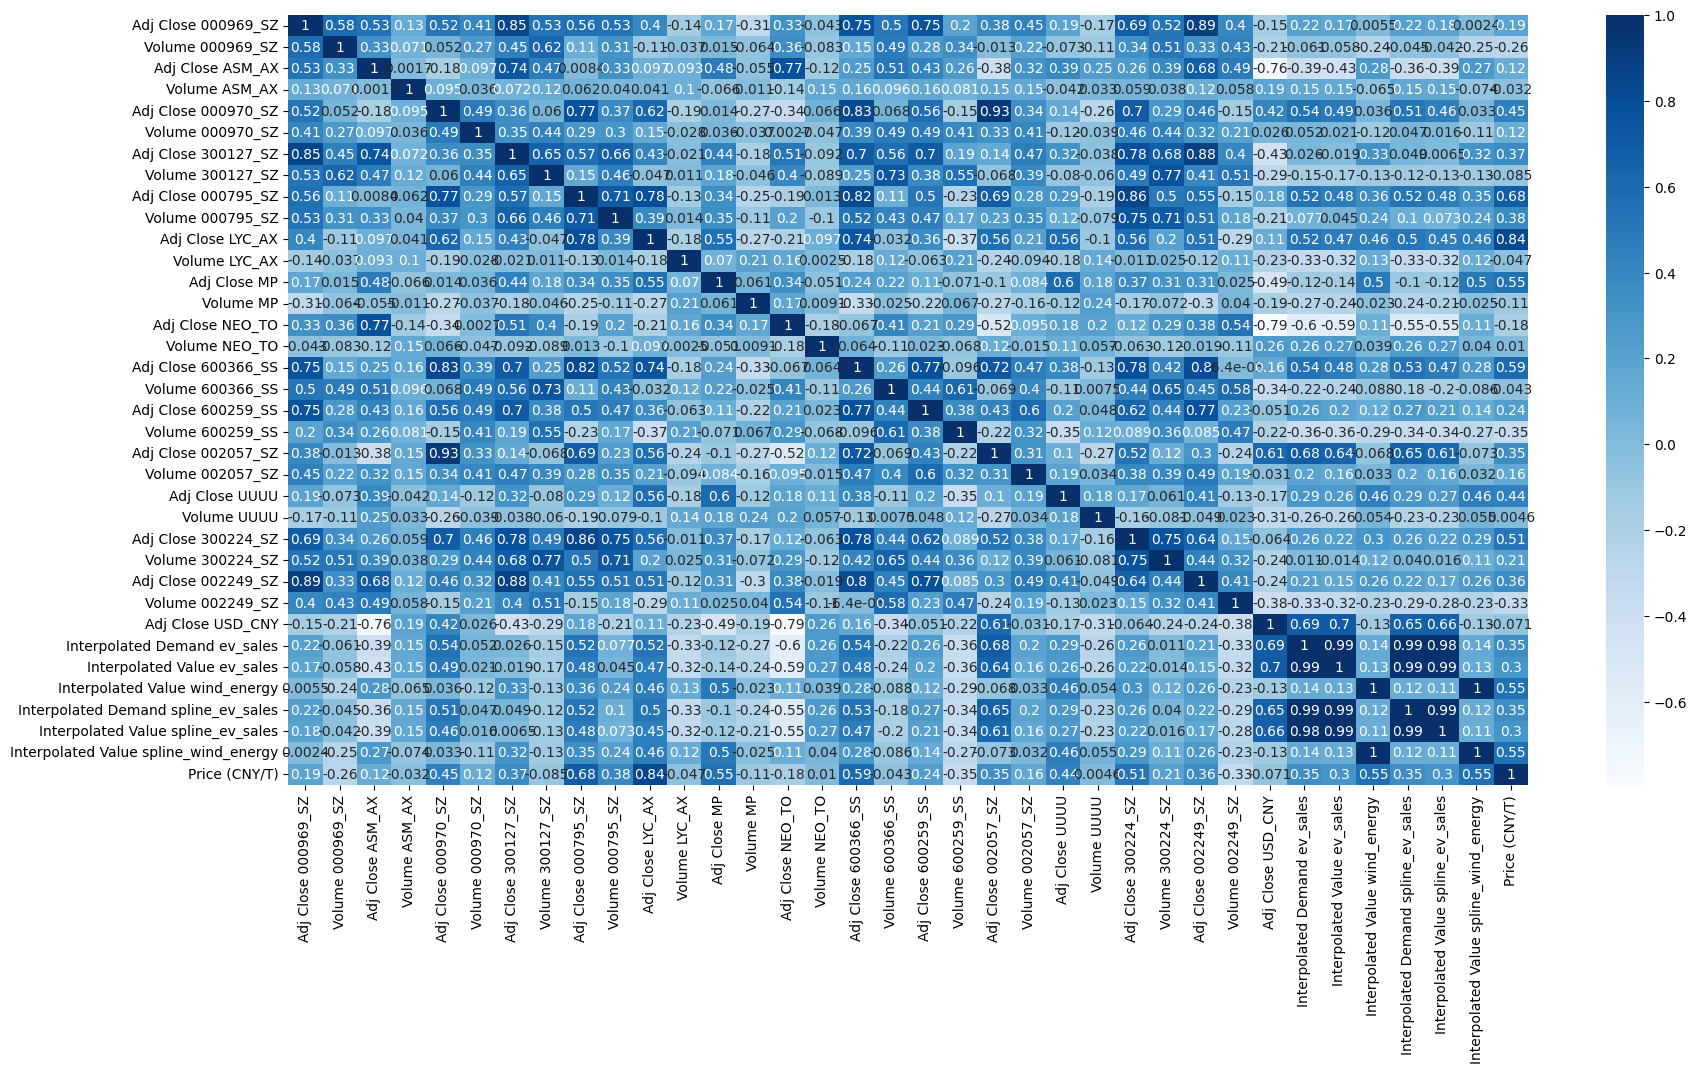

In [12]:
# View Pearson correlation of features on heatmap
plt.figure(figsize = (20,10))
ax =  sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')

In [13]:
# View features that are have a Pearson correlation with Neodymium price greater than 0.4
price_corr = df.corr(numeric_only=True)["Price (CNY/T)"]
price_corr[price_corr > 0.4]

Adj Close 000970_SZ                      0.451065
Adj Close 000795_SZ                      0.683109
Adj Close LYC_AX                         0.837729
Adj Close MP                             0.545379
Adj Close 600366_SS                      0.591638
Adj Close UUUU                           0.439583
Adj Close 300224_SZ                      0.505876
Interpolated Value wind_energy           0.551009
Interpolated Value spline_wind_energy    0.546811
Price (CNY/T)                            1.000000
Name: Price (CNY/T), dtype: float64

Spearman Correlation

In [14]:
# View Spearman correlation of features on heatmap
df.corr(method="spearman")

,Adj Close 000969_SZ,Volume 000969_SZ,Adj Close ASM_AX,Volume ASM_AX,Adj Close 000970_SZ,Volume 000970_SZ,Adj Close 300127_SZ,Volume 300127_SZ,Adj Close 000795_SZ,Volume 000795_SZ,...,Adj Close 002249_SZ,Volume 002249_SZ,Adj Close USD_CNY,Interpolated Demand ev_sales,Interpolated Value ev_sales,Interpolated Value wind_energy,Interpolated Demand spline_ev_sales,Interpolated Value spline_ev_sales,Interpolated Value spline_wind_energy,Price (CNY/T)
Adj Close 000969_SZ,1.000000,0.564735,0.450899,0.087835,0.595828,0.541945,0.854750,0.485633,0.512757,0.531791,...,0.888866,0.313404,-0.230107,0.264438,0.203575,0.008290,0.250789,0.193206,0.003096,0.231922
Volume 000969_SZ,0.564735,1.000000,0.334274,-0.042858,0.017537,0.384100,0.369948,0.589311,-0.036517,0.254644,...,0.302836,0.634144,-0.136664,-0.190796,-0.184529,-0.364739,-0.148204,-0.147086,-0.369812,-0.347773
Adj Close ASM_AX,0.450899,0.334274,1.000000,0.017753,-0.187071,0.105201,0.677021,0.539421,-0.089029,0.342353,...,0.574216,0.511437,-0.788949,-0.373899,-0.418259,0.269806,-0.367100,-0.407129,0.305760,0.060964
Volume ASM_AX,0.087835,-0.042858,0.017753,1.000000,0.184772,0.190012,0.108315,0.115128,0.101447,0.108748,...,0.118376,-0.134120,0.180350,0.217660,0.191346,-0.004086,0.203864,0.181095,-0.023426,0.056993
Adj Close 000970_SZ,0.595828,0.017537,-0.187071,0.184772,1.000000,0.568956,0.493054,0.051181,0.874636,0.499267,...,0.593312,-0.270468,0.268075,0.715776,0.665887,0.234403,0.657715,0.612418,0.194303,0.596431
Volume 000970_SZ,0.541945,0.384100,0.105201,0.190012,0.568956,1.000000,0.518220,0.554537,0.431324,0.622109,...,0.437580,0.194104,0.147475,0.222652,0.184727,-0.052838,0.211384,0.178626,-0.077613,0.216104
Adj Close 300127_SZ,0.854750,0.369948,0.677021,0.108315,0.493054,0.518220,1.000000,0.604676,0.522426,0.669639,...,0.888863,0.303917,-0.511445,0.134150,0.072432,0.268573,0.123287,0.064241,0.267421,0.419260
Volume 300127_SZ,0.485633,0.589311,0.539421,0.115128,0.051181,0.554537,0.604676,1.000000,0.134076,0.675929,...,0.376246,0.586705,-0.319433,-0.218866,-0.224451,-0.135424,-0.171974,-0.182215,-0.132681,-0.022629
Adj Close 000795_SZ,0.512757,-0.036517,-0.089029,0.101447,0.874636,0.431324,0.522426,0.134076,1.000000,0.682102,...,0.543324,-0.277172,0.065061,0.654924,0.624090,0.361441,0.618464,0.588591,0.325625,0.767893
Volume 000795_SZ,0.531791,0.254644,0.342353,0.108748,0.499267,0.622109,0.669639,0.675929,0.682102,1.000000,...,0.534313,0.164374,-0.203923,0.177661,0.142018,0.201472,0.173898,0.137747,0.188167,0.537075


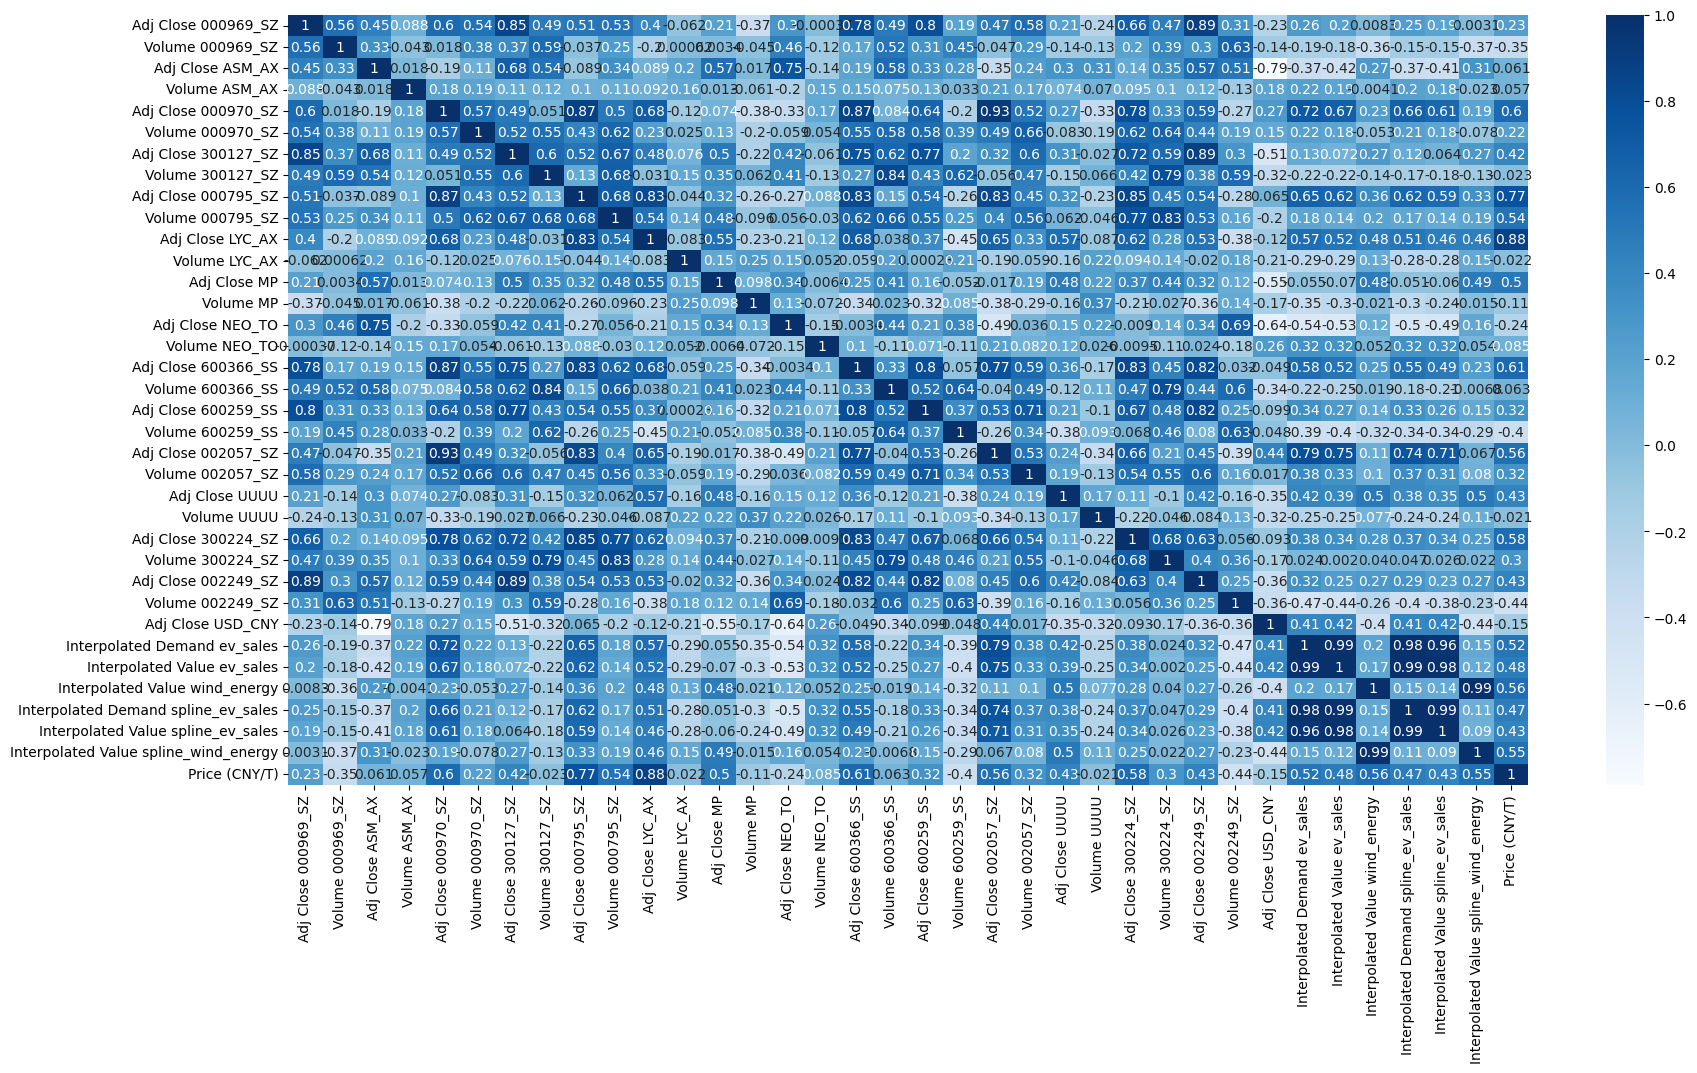

In [15]:
# View Spearman correlation of features on heatmap
plt.figure(figsize = (20,10))
ax =  sns.heatmap(df.corr(numeric_only=True, method="spearman"), annot=True, cmap='Blues')

In [16]:
# View features that are have a Spearman correlation with Neodymium price greater than 0.4
price_corr = df.corr(method="spearman")["Price (CNY/T)"]
price_corr[price_corr > 0.4]

Adj Close 000970_SZ                      0.596431
Adj Close 300127_SZ                      0.419260
Adj Close 000795_SZ                      0.767893
Volume 000795_SZ                         0.537075
Adj Close LYC_AX                         0.882562
Adj Close MP                             0.503124
Adj Close 600366_SS                      0.606371
Adj Close 002057_SZ                      0.555474
Adj Close UUUU                           0.430854
Adj Close 300224_SZ                      0.578596
Adj Close 002249_SZ                      0.428411
Interpolated Demand ev_sales             0.521038
Interpolated Value ev_sales              0.479967
Interpolated Value wind_energy           0.564401
Interpolated Demand spline_ev_sales      0.470467
Interpolated Value spline_ev_sales       0.433505
Interpolated Value spline_wind_energy    0.547525
Price (CNY/T)                            1.000000
Name: Price (CNY/T), dtype: float64

F-test

In [17]:
# Conduct F-test to determine relevancy of features
X = df.loc[:, df.columns != 'Price (CNY/T)']
y = df['Price (CNY/T)']

f_values, _ = f_regression(X, y)
threshold = 100

selected_features = X.columns[f_values > threshold]
selected_features

Index(['Adj Close 000970_SZ', 'Adj Close 300127_SZ', 'Adj Close 000795_SZ',
       'Volume 000795_SZ', 'Adj Close LYC_AX', 'Adj Close MP',
       'Adj Close 600366_SS', 'Adj Close 002057_SZ', 'Adj Close UUUU',
       'Adj Close 300224_SZ', 'Adj Close 002249_SZ',
       'Interpolated Demand ev_sales', 'Interpolated Value wind_energy',
       'Interpolated Demand spline_ev_sales',
       'Interpolated Value spline_wind_energy'],
      dtype='object')

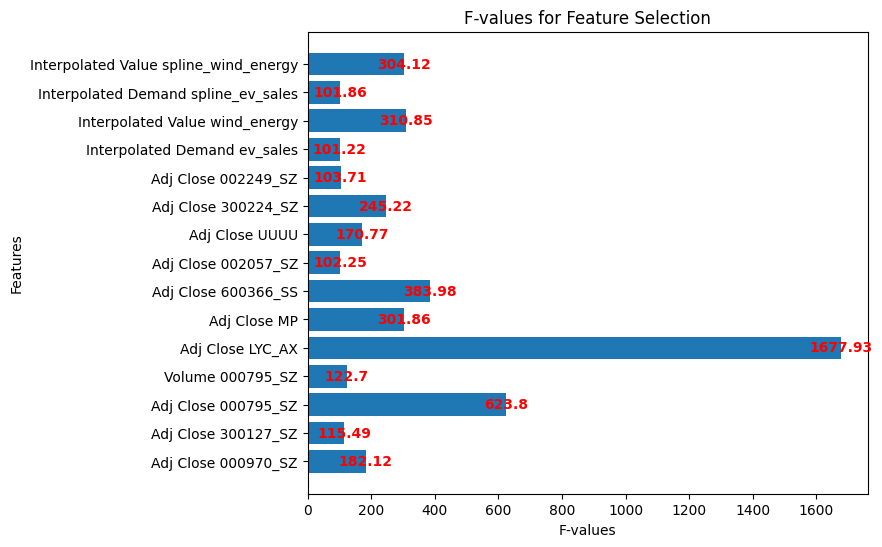

In [18]:
# View F-values on bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bar_plot = ax.barh(selected_features, f_values[f_values > threshold])

for i, v in enumerate(f_values[f_values > threshold]):
    ax.text(v + 0.1, i, str(round(v, 2)), color='red', fontweight='bold', ha='center', va='center')

plt.subplots_adjust(left=0.2)
ax.set_xlabel('F-values')
ax.set_ylabel('Features')
ax.set_title('F-values for Feature Selection')

plt.show()

Linear Regression

In [19]:
df_columns_list = df.columns.tolist()
predicted = df_columns_list[-1]
variables = df_columns_list[0:-1]
variables_string = ""
for var in variables:
    variables_string = variables_string + (var + ",")
# variables_string = variables_string[0:-1] ## Remove the last comma
variables_string = variables_string[0:19] 
linear_regression_formula = f"{variables_string} ~ {predicted}"
variables_string

'Adj Close 000969_SZ'

In [20]:
model = sm.OLS(df["Price (CNY/T)"], df.loc[:, df.columns != "Price (CNY/T)"]).fit()

In [21]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:          Price (CNY/T)   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              2868.
Date:                Tue, 21 Mar 2023   Prob (F-statistic):                        0.00
Time:                        20:03:08   Log-Likelihood:                         -9081.7
No. Observations:                 715   AIC:                                  1.823e+04
Df Residuals:                     680   BIC:                                  1.839e+04
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------

## Model Building

1-Day Forecast Model

In [22]:
# Possible features from feature selection
cols_correlation = ["Adj Close 000970_SZ", "Adj Close 000795_SZ", "Adj Close LYC_AX", "Adj Close 600366_SS", "Adj Close 002057_SZ", 
        "Adj Close UUUU", "Adj Close 300224_SZ", "Interpolated Demand spline_ev_sales", "Interpolated Value spline_ev_sales", "Price (CNY/T)"]
# additional "Interpolated Demand spline_ev_sales", "Interpolated Value spline_ev_sales"

cols_ftest = ['Adj Close 000970_SZ', 'Adj Close 300127_SZ', 'Adj Close 000795_SZ', 'Volume 000795_SZ', 'Adj Close LYC_AX', 'Adj Close MP',
        'Adj Close 600366_SS', 'Adj Close 002057_SZ', 'Adj Close UUUU', 'Adj Close 300224_SZ', 'Adj Close 002249_SZ',
        'Interpolated Demand ev_sales', 'Interpolated Value wind_energy','Interpolated Demand spline_ev_sales','Interpolated Value spline_wind_energy']
# additional 'Adj Close 300127_SZ', 'Volume 000795_SZ', 'Adj Close MP', 'Adj Close 002249_SZ', 'Interpolated Demand ev_sales', 'Interpolated Value wind_energy','Interpolated Demand spline_ev_sales','Interpolated Value spline_wind_energy'

In [23]:
# Final features selected
#added Adj Close MP and Interpolated Demand ev_sales, removed Interpolated Value spline_ev_sales
cols =  ["Adj Close MP", "Adj Close 000970_SZ", "Adj Close 000795_SZ", "Adj Close LYC_AX", "Adj Close 600366_SS", "Adj Close 002057_SZ", 
        "Adj Close UUUU", "Adj Close 300224_SZ", "Interpolated Demand spline_ev_sales", "Interpolated Demand ev_sales", "Price (CNY/T)"]

In [24]:
"""
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df_s = DataFrame(data)
    colms, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        colms.append(df_s.shift(i))
    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        colms.append(df_s.shift(-i))
    if i == 0:
        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
    else:
        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(colms, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
    """

"\n# convert series to supervised learning\ndef series_to_supervised(data, n_in=1, n_out=1, dropnan=True):\n    n_vars = 1 if type(data) is list else data.shape[1]\n    df_s = DataFrame(data)\n    colms, names = list(), list()\n    # input sequence (t-n, ... t-1)\n    for i in range(n_in, 0, -1):\n        colms.append(df_s.shift(i))\n    names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]\n    # forecast sequence (t, t+1, ... t+n)\n    for i in range(0, n_out):\n        colms.append(df_s.shift(-i))\n    if i == 0:\n        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]\n    else:\n        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]\n    # put it all together\n    agg = concat(colms, axis=1)\n    agg.columns = names\n    # drop rows with NaN values\n    if dropnan:\n        agg.dropna(inplace=True)\n    return agg\n    "

In [25]:

"""
# load dataset
#dataset = read_csv('pollution.csv', header=0, index_col=0)
values = df2.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[10,11,12,13,14,15,16,17,18]], axis=1, inplace=True)
print(reframed.head())
"""

"\n# load dataset\n#dataset = read_csv('pollution.csv', header=0, index_col=0)\nvalues = df2.values\n# integer encode direction\nencoder = LabelEncoder()\nvalues[:,4] = encoder.fit_transform(values[:,4])\n# ensure all data is float\nvalues = values.astype('float32')\n# normalize features\nscaler = MinMaxScaler(feature_range=(0, 1))\nscaled = scaler.fit_transform(values)\n# frame as supervised learning\nreframed = series_to_supervised(scaled, 1, 1)\n# drop columns we don't want to predict\nreframed.drop(reframed.columns[[10,11,12,13,14,15,16,17,18]], axis=1, inplace=True)\nprint(reframed.head())\n"

In [26]:
# Final features to be used
df2 = df[cols]
df2["1 Day Later Price (CNY/T)"] = df2["Price (CNY/T)"].shift(-1)

C:\Users\brian\AppData\Local\Temp\ipykernel_21176\3204009731.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["1 Day Later Price (CNY/T)"] = df2["Price (CNY/T)"].shift(-1)


In [27]:
# Scaling of features
scaler = MinMaxScaler(feature_range=(0, 1))
scaleddf = scaler.fit_transform(df2)

In [28]:
# Splitting of explanatory features and target variable to train, validation and test sets
X, y = scaleddf[:-1, :-1], scaleddf[:-1, -1] # 1-day price prediction as target

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2, shuffle=True)

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [29]:
# Creation of Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2]))))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [30]:
# Fitting data into model 
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(val_X, val_y), verbose=2, shuffle=False)

Epoch 1/50
7/7 - 6s - loss: 0.3544 - val_loss: 0.2448 - 6s/epoch - 810ms/step
Epoch 2/50
7/7 - 0s - loss: 0.2029 - val_loss: 0.1347 - 60ms/epoch - 9ms/step
Epoch 3/50
7/7 - 0s - loss: 0.1419 - val_loss: 0.1337 - 59ms/epoch - 8ms/step
Epoch 4/50
7/7 - 0s - loss: 0.1453 - val_loss: 0.1316 - 61ms/epoch - 9ms/step
Epoch 5/50
7/7 - 0s - loss: 0.1357 - val_loss: 0.1132 - 59ms/epoch - 8ms/step
Epoch 6/50
7/7 - 0s - loss: 0.1194 - val_loss: 0.1058 - 64ms/epoch - 9ms/step
Epoch 7/50
7/7 - 0s - loss: 0.1146 - val_loss: 0.0991 - 66ms/epoch - 9ms/step
Epoch 8/50
7/7 - 0s - loss: 0.1062 - val_loss: 0.0900 - 65ms/epoch - 9ms/step
Epoch 9/50
7/7 - 0s - loss: 0.0963 - val_loss: 0.0833 - 60ms/epoch - 9ms/step
Epoch 10/50
7/7 - 0s - loss: 0.0892 - val_loss: 0.0767 - 60ms/epoch - 9ms/step
Epoch 11/50
7/7 - 0s - loss: 0.0832 - val_loss: 0.0704 - 60ms/epoch - 9ms/step
Epoch 12/50
7/7 - 0s - loss: 0.0769 - val_loss: 0.0633 - 61ms/epoch - 9ms/step
Epoch 13/50
7/7 - 0s - loss: 0.0690 - val_loss: 0.0571 - 69ms

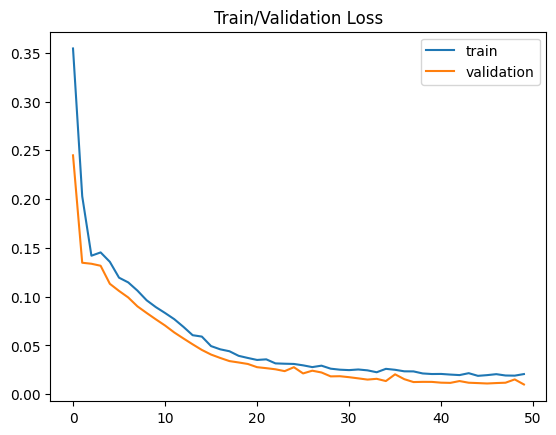

In [31]:
# Plot train/validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.title("Train/Validation Loss")
plt.show()

In [32]:
# Predicting test set 
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

inv_yhat = concatenate((test_X[:, :], yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]

test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_X[:, :], test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

5/5 [==============================] - 1s 2ms/step


In [33]:
# Calculate model performance 
r2score = r2_score(inv_y, inv_yhat)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))

print('1 Days Forecast BiLSTM Model')
print('Test r2score: %.3f' % r2score)
print('Test RMSE: %.3f' % rmse)

1 Days Forecast BiLSTM Model
Test r2score: 0.966
Test RMSE: 9649.201


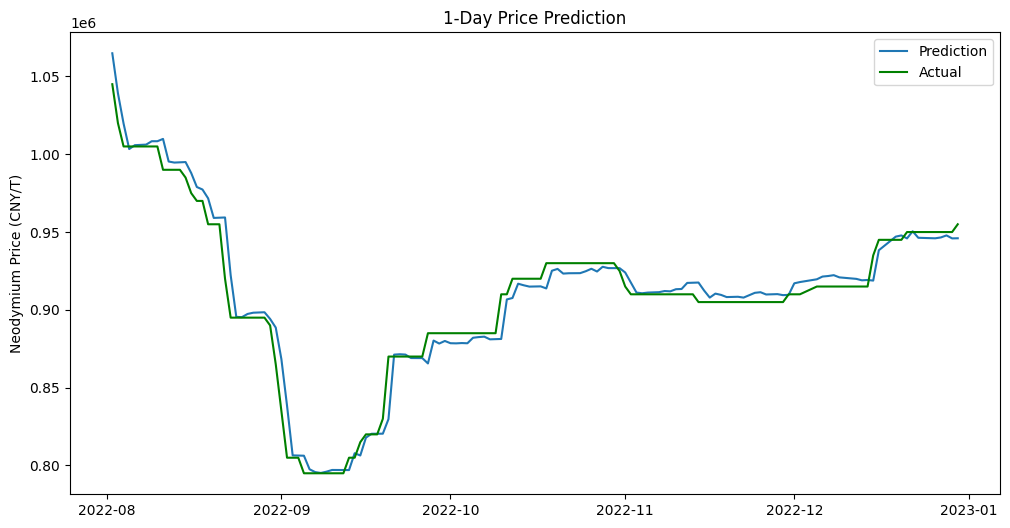

In [34]:
# Plot predicted values 
dates = df.index[-len(test_y):]
plt.figure(figsize=(12, 6))
plt.plot(dates, inv_yhat, label="Prediction")
plt.plot(dates, inv_y, label="Actual", color="green")
plt.title("1-Day Price Prediction")
plt.ylabel("Neodymium Price (CNY/T)")
plt.legend()

5-Days Forecast Model

In [35]:
# Final features to be used
df2 = df[cols]
df2["5 Days Later Price (CNY/T)"] = df2["Price (CNY/T)"].shift(-5)

C:\Users\brian\AppData\Local\Temp\ipykernel_21176\2626179344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["5 Days Later Price (CNY/T)"] = df2["Price (CNY/T)"].shift(-5)


In [36]:
# Scaling of features
scaler = MinMaxScaler(feature_range=(0, 1))
scaleddf = scaler.fit_transform(df2)

In [37]:
# Splitting of explanatory features and target variable to train, validation and test sets
X, y = scaleddf[:-5, :-1], scaleddf[:-5, -1] # 5-day price prediction as target

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2, shuffle=True)

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [38]:
# Creation of Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2]))))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [39]:
# Fitting data into model 
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(val_X, val_y), verbose=2, shuffle=False)

Epoch 1/50
7/7 - 5s - loss: 0.3194 - val_loss: 0.2413 - 5s/epoch - 746ms/step
Epoch 2/50
7/7 - 0s - loss: 0.1759 - val_loss: 0.1359 - 58ms/epoch - 8ms/step
Epoch 3/50
7/7 - 0s - loss: 0.1370 - val_loss: 0.1408 - 57ms/epoch - 8ms/step
Epoch 4/50
7/7 - 0s - loss: 0.1391 - val_loss: 0.1288 - 57ms/epoch - 8ms/step
Epoch 5/50
7/7 - 0s - loss: 0.1232 - val_loss: 0.1137 - 59ms/epoch - 8ms/step
Epoch 6/50
7/7 - 0s - loss: 0.1132 - val_loss: 0.1125 - 60ms/epoch - 9ms/step
Epoch 7/50
7/7 - 0s - loss: 0.1078 - val_loss: 0.0996 - 61ms/epoch - 9ms/step
Epoch 8/50
7/7 - 0s - loss: 0.0994 - val_loss: 0.0915 - 59ms/epoch - 8ms/step
Epoch 9/50
7/7 - 0s - loss: 0.0903 - val_loss: 0.0847 - 60ms/epoch - 9ms/step
Epoch 10/50
7/7 - 0s - loss: 0.0848 - val_loss: 0.0761 - 60ms/epoch - 9ms/step
Epoch 11/50
7/7 - 0s - loss: 0.0802 - val_loss: 0.0692 - 60ms/epoch - 9ms/step
Epoch 12/50
7/7 - 0s - loss: 0.0732 - val_loss: 0.0617 - 59ms/epoch - 8ms/step
Epoch 13/50
7/7 - 0s - loss: 0.0659 - val_loss: 0.0546 - 58ms

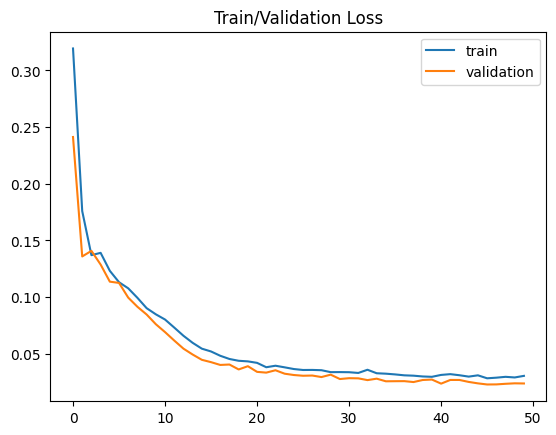

In [40]:
# Plot train/validation loss 
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.title("Train/Validation Loss")
plt.show()

In [41]:
# Predicting test set 
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

inv_yhat = concatenate((test_X[:, :], yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]

test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_X[:, :], test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

5/5 [==============================] - 1s 2ms/step


In [42]:
# Calculate model performance 
r2score = r2_score(inv_y, inv_yhat)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))

print('5 Days Forecast BiLSTM Model')
print('Test R2 score: %.3f' % r2score)
print('Test RMSE: %.3f' % rmse)

5 Days Forecast BiLSTM Model
Test R2 score: 0.679
Test RMSE: 29141.208


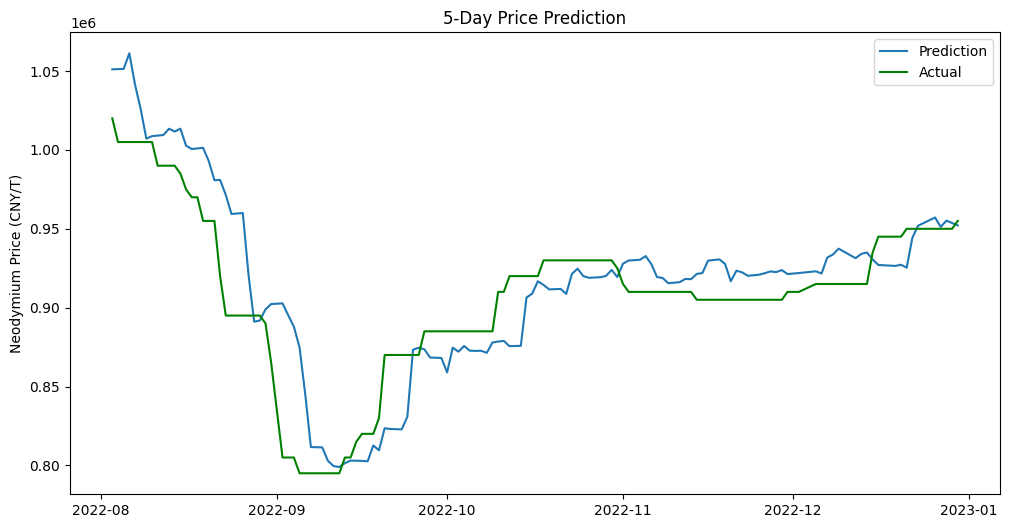

In [43]:
# Plot predicted values 
dates = df.index[-len(test_y):]
plt.figure(figsize=(12, 6))
plt.plot(dates, inv_yhat, label="Prediction")
plt.plot(dates, inv_y, label="Actual", color="green")
plt.title("5-Day Price Prediction")
plt.ylabel("Neodymium Price (CNY/T)")
plt.legend()

5 Days Price Direction

In [557]:
# Final features to be used
df3 = df[cols]
for c in cols:
    df3["5 Days Ago " + c + " Change"] = df[c] - df[c].shift(5)
df3["5 Days Later Price Change Direction"] = df["Price (CNY/T)"].shift(-5) - df["Price (CNY/T)"]
df3["5 Days Later Price Change Direction"] = list(map(lambda x: 1 if x > 0 else (-1 if x < 0 else 0), df3["5 Days Later Price Change Direction"].tolist()))

C:\Users\brian\AppData\Local\Temp\ipykernel_21176\2087587886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["5 Days Ago " + c + " Change"] = df[c] - df[c].shift(5)
C:\Users\brian\AppData\Local\Temp\ipykernel_21176\2087587886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["5 Days Ago " + c + " Change"] = df[c] - df[c].shift(5)
C:\Users\brian\AppData\Local\Temp\ipykernel_21176\2087587886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [558]:
# Scaling of features
scaler = MinMaxScaler(feature_range=(0, 1))
scaleddf = scaler.fit_transform(df3)

In [560]:
# Splitting of explanatory features and target variable to train, validation and test sets
X, y = np.array(df3.iloc[5:-5, :-1]), np.array(df3.iloc[5:-5, -1]) # 5-day price prediction as target

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2, shuffle=True)

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [562]:
# One-hot encoding of target features into 0, 1, -1 classes
train_y = to_categorical(train_y, 3)
val_y = to_categorical(val_y, 3)
test_y = to_categorical(test_y, 3)

In [581]:
# Creation of Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(80, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2]))))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [582]:
# Fitting data into model 
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(val_X, val_y), verbose=2, shuffle=False)

Epoch 1/50
7/7 - 4s - loss: 26828.9297 - accuracy: 0.3525 - val_loss: 3289.5200 - val_accuracy: 0.5575 - 4s/epoch - 556ms/step
Epoch 2/50
7/7 - 0s - loss: 24771.0273 - accuracy: 0.3193 - val_loss: 4344.3999 - val_accuracy: 0.5841 - 103ms/epoch - 15ms/step
Epoch 3/50
7/7 - 0s - loss: 21348.6777 - accuracy: 0.3171 - val_loss: 3072.2488 - val_accuracy: 0.5310 - 101ms/epoch - 14ms/step
Epoch 4/50
7/7 - 0s - loss: 19681.9219 - accuracy: 0.3237 - val_loss: 3847.8533 - val_accuracy: 0.3274 - 100ms/epoch - 14ms/step
Epoch 5/50
7/7 - 0s - loss: 19707.7676 - accuracy: 0.3282 - val_loss: 2464.3496 - val_accuracy: 0.3894 - 104ms/epoch - 15ms/step
Epoch 6/50
7/7 - 0s - loss: 15819.4707 - accuracy: 0.3659 - val_loss: 2509.9707 - val_accuracy: 0.5841 - 103ms/epoch - 15ms/step
Epoch 7/50
7/7 - 0s - loss: 15054.5684 - accuracy: 0.3570 - val_loss: 2581.8977 - val_accuracy: 0.5487 - 121ms/epoch - 17ms/step
Epoch 8/50
7/7 - 0s - loss: 11978.5088 - accuracy: 0.3858 - val_loss: 3195.1670 - val_accuracy: 0.3

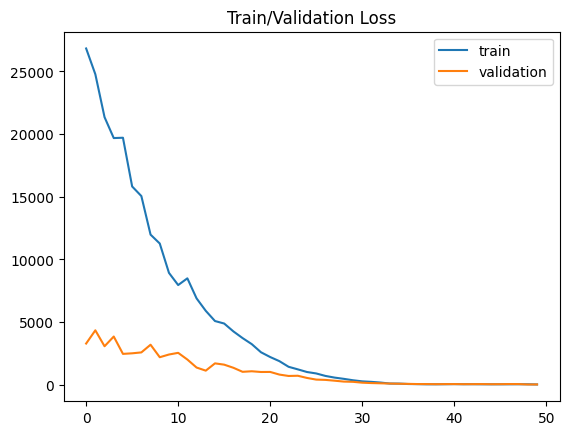

In [583]:
# Plot train/validation loss 
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.title("Train/Validation Loss")
plt.show()

In [584]:
yhat = model.predict(test_X)
yhat_cat = list(map(lambda x: 0 if max(x)==x[0] else (1 if max(x)==x[1] else -1), yhat))
y_cat = list(map(lambda x: 0 if max(x)==x[0] else (1 if max(x)==x[1] else -1), test_y))

5/5 [==============================] - 0s 2ms/step


In [594]:
# Accuracy score
accuracy_score(y_cat, yhat_cat)

0.45390070921985815

In [586]:
# Confusion Matrix
cm = confusion_matrix(y_cat, yhat_cat)
cm_df = pd.DataFrame(cm,
                     index = ['Actual Decrease','Actual No Change','Actual Increase'], 
                     columns = ['Predict Decrease','Predict No Change','Predict Increase'])
cm_df

,Predict Decrease,Predict No Change,Predict Increase
Actual Decrease,16,8,21
Actual No Change,7,1,41
Actual Increase,0,0,47


In [595]:
# Precision, recall, F1-score and support
print(classification_report(y_cat, yhat_cat))

              precision    recall  f1-score   support

          -1       0.70      0.36      0.47        45
           0       0.11      0.02      0.03        49
           1       0.43      1.00      0.60        47

    accuracy                           0.45       141
   macro avg       0.41      0.46      0.37       141
weighted avg       0.40      0.45      0.36       141

